## Telecommunication Case Study

## Business Understanding

    The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators raised the level of competition. Companies are working hard to survive in this competitive market depending on multiple strategies. Three main strategies have been proposed to generate more revenues: 
1. Acquire new customers 
2. Upsell the existing customers
3. Increase the retention period of customers 
However, comparing these strategies taking the value of return on investment (RoI) of each into account has shown that the third strategy is the most profitable strategy, proving that retaining an existing customer costs much lower than acquiring a new one, in addition to being considered much easier than the upselling strategy. To apply the third strategy, companies have to decrease the potential of customer’s churn, known as "the customer movement from one provider to another".

  Customer churn is a considerable concern in service sectors with high competitive services. On the other hand, predicting the customers who are likely to leave the company will represent a potentially large additional revenue source if it is done in the early phase.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.


In [17]:
import pandas as pd
import numpy as np

## Step 1: Load the data and Perform the Basic EDA

In [18]:
df = pd.read_csv("churn_dataset.csv")

In [19]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

##  Step 2: Documentation

In [20]:
# Input and Output/Target Variables
X = df.drop(columns=['Churn'])  # Assuming 'Churn' is the target variable
y = df['Churn']

# Type of ML Task: Classification

# Evaluation Metric: Accuracy


## Step 3: Splitting the Data Into Train and Test

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Displaying the shape of the train and test datasets
print('Training set shape:', train_df.shape)
print('Testing set shape:', test_df.shape)

Training set shape: (5282, 21)
Testing set shape: (1761, 21)


## Step 4: Data Preparation on Train Data

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Identifying numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')  # Removing target variable from categorical columns

# Creating transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating preprocessing pipelines for both types of data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fitting the transformer on the training data
preprocessor.fit(train_df.drop('Churn', axis=1))

print('Data preparation steps completed for training data.')

Data preparation steps completed for training data.


## Step 5: Data Preparation on Test Data

In [23]:
# Transforming the test data using the fitted preprocessor
X_train_prepared = preprocessor.transform(train_df.drop('Churn', axis=1))
X_test_prepared = preprocessor.transform(test_df.drop('Churn', axis=1))

print('Data preparation steps completed for test data.')

Data preparation steps completed for test data.


## Step 6: Model Training Phase

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preparing the target variable
y_train = train_df['Churn']
y_test = test_df['Churn']

# Initializing models
knn = KNeighborsClassifier()
log_reg = LogisticRegression()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Training models
knn.fit(X_train_prepared, y_train)
log_reg.fit(X_train_prepared, y_train)
svm.fit(X_train_prepared, y_train)
decision_tree.fit(X_train_prepared, y_train)
random_forest.fit(X_train_prepared, y_train)

print('All models have been trained.')

All models have been trained.


In [25]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train_prepared)

# Transform both the training and test data
X_train_prepared = imputer.transform(X_train_prepared)
X_test_prepared = imputer.transform(X_test_prepared)

In [26]:
print('All models have been trained.')

All models have been trained.


## Step 7: Predicting and evaluating the each model

In [27]:
# Fitting the KNeighborsClassifier
knn.fit(X_train_prepared, y_train)

# Calculating accuracy scores
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_prepared))
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test_prepared))
svm_accuracy = accuracy_score(y_test, svm.predict(X_test_prepared))
decision_tree_accuracy = accuracy_score(y_test, decision_tree.predict(X_test_prepared))
random_forest_accuracy = accuracy_score(y_test, random_forest.predict(X_test_prepared))

print('Accuracy scores for each model:')
print('KNN:', knn_accuracy)
print('Logistic Regression:', log_reg_accuracy)
print('SVM:', svm_accuracy)
print('Decision Tree:', decision_tree_accuracy)
print('Random Forest:', random_forest_accuracy)

Accuracy scores for each model:
KNN: 0.7654741624077229
Logistic Regression: 0.8143100511073254
SVM: 0.8086314593980692
Decision Tree: 0.7694491766042022
Random Forest: 0.7859170925610448


# Step 8: Model Comparison and Conclusion

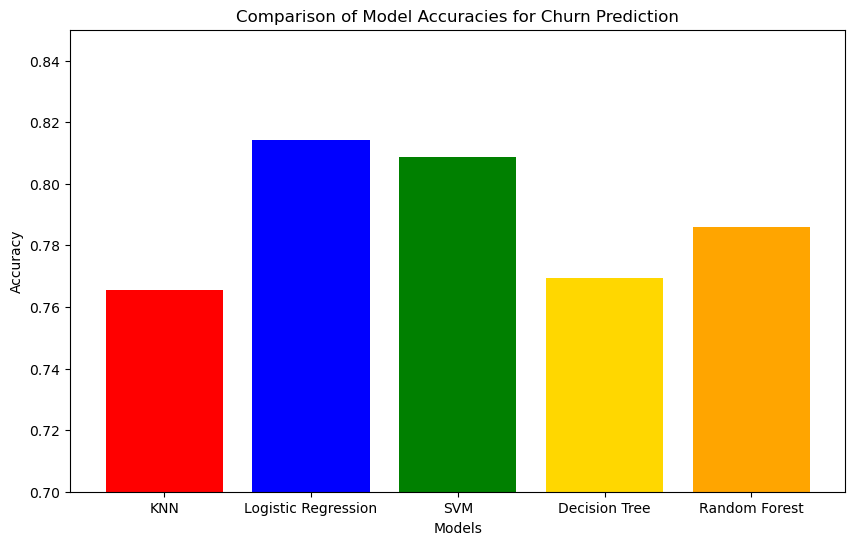

Based on the accuracies achieved, the best algorithm for Churn Prediction is Logistic Regression.


In [28]:
# prompt: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction and add colours to the graph

import matplotlib.pyplot as plt
# Model names and corresponding accuracies
model_names = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
accuracies = [knn_accuracy, log_reg_accuracy, svm_accuracy, decision_tree_accuracy, random_forest_accuracy]

# Creating the plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(model_names, accuracies, color=['red', 'blue', 'green', 'gold', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies for Churn Prediction')
plt.ylim([0.7, 0.85])  # Adjust y-axis to better visualize differences
plt.show()

# Conclusion based on the results
best_model_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_index]

print(f"Based on the accuracies achieved, the best algorithm for Churn Prediction is {best_model_name}.")
